# Model Evaluation

## Imports

### Third party modules

In [1]:
# Built in
import pickle
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from statsmodels.tsa.seasonal import MSTL, STL
from xgboost import XGBRegressor


### First party modules

In [2]:
# Get the project root
ROOT_DIR = Path.cwd().parent

# Add root path as path project for modules imports
sys.path.append(str(ROOT_DIR))  
from src.data.preprocessor import filter_by_date_range

### Optional packages

In [3]:
try:
    from catppuccin import PALETTE  # Just for aesthetic proposes
    catppuccin_imported = True
except ImportError:
    print("The catppuccin package is not installed, no matter :), plots will use the default visual configuration.")
    catppuccin_imported = False

In [31]:
if catppuccin_imported:
    # Choose a flavor (latte, frappe, macchiato, mocha)
    flavor = PALETTE.latte

    # Extract colors as hex values in a dict for easy access
    colors = {
        color.name.lower().replace(" ", "_"): color.hex for color in flavor.colors
    }

    # Define color cycle for plots (select the colors you want to use)
    color_cycle = [
        colors["blue"],
        colors["pink"],
        colors["green"],
        colors["yellow"],
        colors["red"],
        colors["teal"],
        colors["peach"],
        colors["mauve"],
        colors["lavender"],
    ]

    # Configure matplotlib
    plt.rcParams["axes.prop_cycle"] = plt.cycler(color=color_cycle)
    plt.rcParams["axes.facecolor"] = "white"  # Set axes background to white
    plt.rcParams["figure.facecolor"] = "white"  # Set figure background to white
    plt.rcParams["text.color"] = colors["text"]
    plt.rcParams["axes.labelcolor"] = colors["text"]
    plt.rcParams["xtick.color"] = colors["subtext_1"]
    plt.rcParams["ytick.color"] = colors["subtext_1"]
    plt.rcParams["axes.edgecolor"] = colors["surface_2"]
    plt.rcParams["grid.color"] = colors["surface_0"]  # Catppuccin white for grid

    # Configure seaborn
    sns.set_palette(color_cycle)
    sns.set_style(
        {
            "axes.facecolor": colors["mantle"],  # Set axes background to white
            "figure.facecolor": colors["mantle"],  # Set figure background to white
            "text.color": colors["text"],
            "axes.labelcolor": colors["text"],
            "xtick.color": colors["subtext_1"],
            "ytick.color": colors["subtext_1"],
            "axes.edgecolor": colors["surface_2"],
            "grid.color": colors["surface_0"],  # Catppuccin white for grid
        },
    )


else:
    sns.set_theme(style="darkgrid")

In [ ]:
{
    "rosewater": "#f5e0dc",
    "flamingo": "#f2cdcd",
    "pink": "#f5c2e7",
    "mauve": "#cba6f7",
    "red": "#f38ba8",
    "maroon": "#eba0ac",
    "peach": "#fab387",
    "yellow": "#f9e2af",
    "green": "#a6e3a1",
    "teal": "#94e2d5",
    "sky": "#89dceb",
    "sapphire": "#74c7ec",
    "blue": "#89b4fa",
    "lavender": "#b4befe",
    "text": "#cdd6f4",
    "subtext_1": "#bac2de",
    "subtext_0": "#a6adc8",
    "overlay_2": "#9399b2",
    "overlay_1": "#7f849c",
    "overlay_0": "#6c7086",
    "surface_2": "#585b70",
    "surface_1": "#45475a",
    "surface_0": "#313244",
    "base": "#1e1e2e",
    "mantle": "#181825",
    "crust": "#11111b",
}

## Data

### Set paths

In [6]:
# replace for "../data/raw/daily_energy_production.csv" for a classic path
processed_path = ROOT_DIR / "data" / "processed"
plots_path = ROOT_DIR / "plots"

### Import data

In [7]:
ssrd_means_path = processed_path / "weather" / "ssrd_means.csv"
ttc_means_path = processed_path / "weather" / "ttc_means.csv"
generation_tipo_path = processed_path / "generation_tipo.csv"
ssrd = pd.read_csv(ssrd_means_path)
ttc = pd.read_csv(ttc_means_path)
generation_tipo = pd.read_csv(generation_tipo_path)

generation_tipo["datetime"] = pd.to_datetime(generation_tipo["datetime"])
generation_tipo = generation_tipo.set_index("datetime")
# generation_tipo = generation_tipo.drop(columns="Unnamed: 0")
# generation_tipo.to_csv(processed_path / "a.csv")

ssrd["datetime"] = pd.to_datetime(ssrd["datetime"])
ssrd = ssrd.set_index("datetime")

ttc["datetime"] = pd.to_datetime(ttc["datetime"])
ttc = ttc.set_index("datetime")

In [37]:
ssrd_plot.columns

Index(['Región de Arica y Parinacota', 'Región de Tarapacá',
       'Región de Antofagasta', 'Región de Magallanes y Antártica Chilena',
       'Región de Aysén del Gral.Ibañez del Campo', 'Región de Atacama',
       'Región de Coquimbo', 'Región de Valparaíso',
       'Región Metropolitana de Santiago', 'Región de Los Lagos',
       'Región de Los Ríos', 'Región de La Araucanía', 'Región del Bío-Bío',
       'Región de Ñuble', 'Región del Maule',
       'Región del Libertador Bernardo O'Higgins', 'Zona sin demarcar'],
      dtype='object')

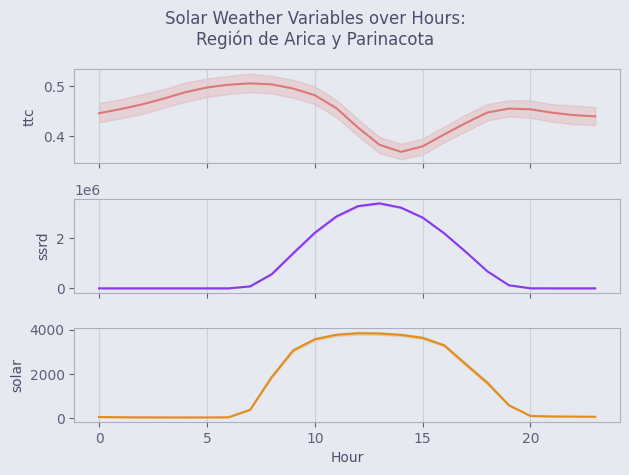

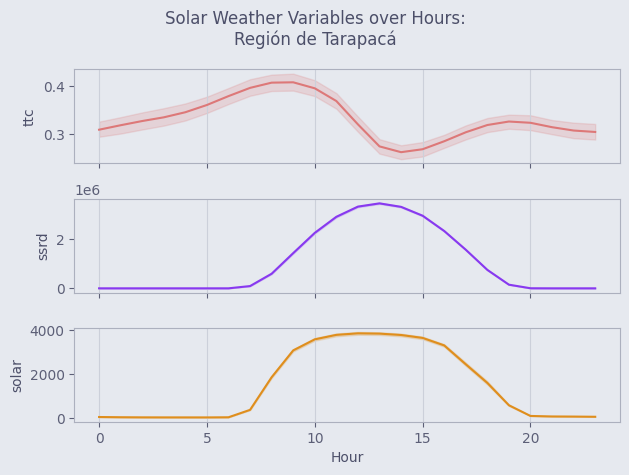

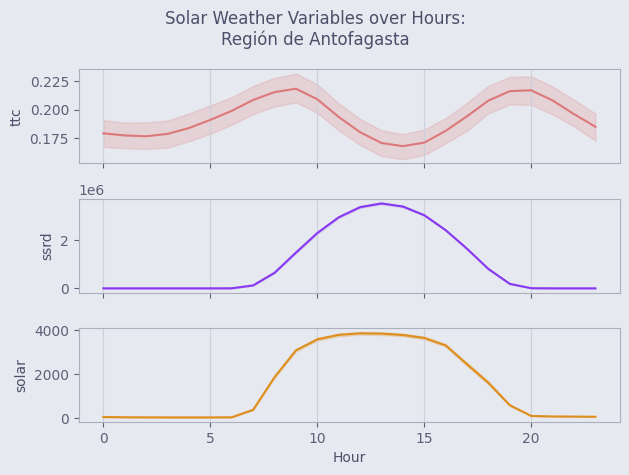

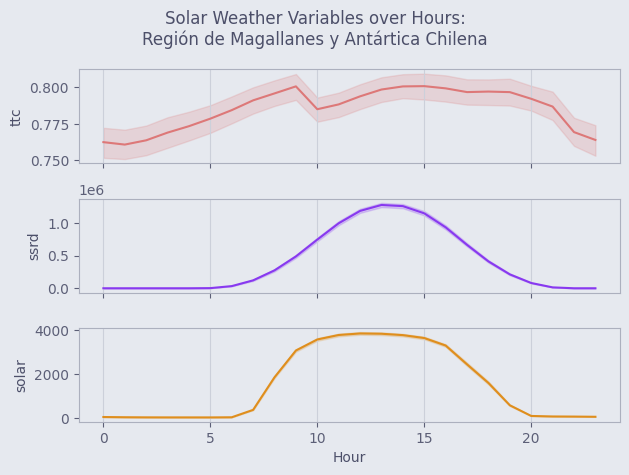

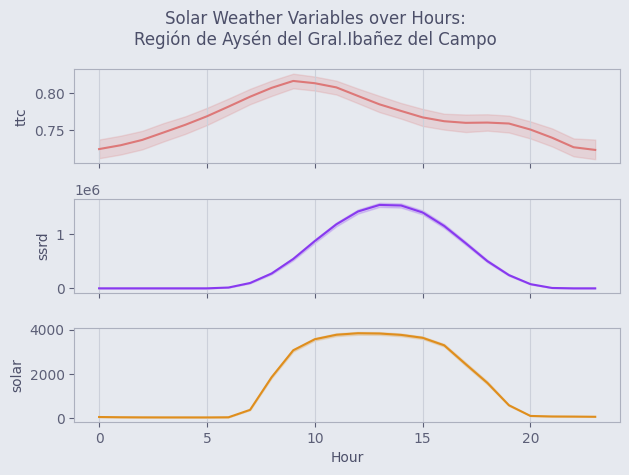

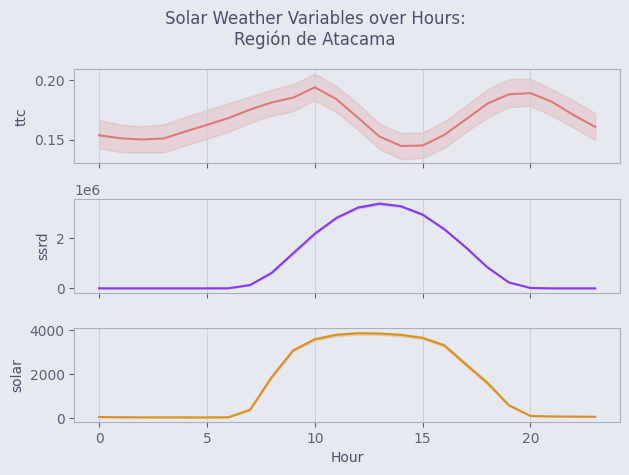

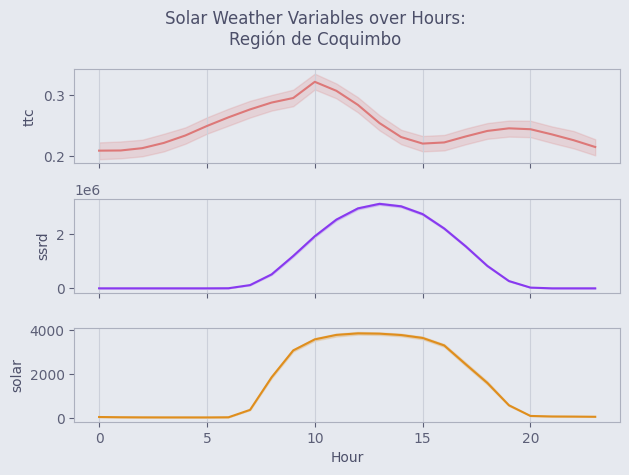

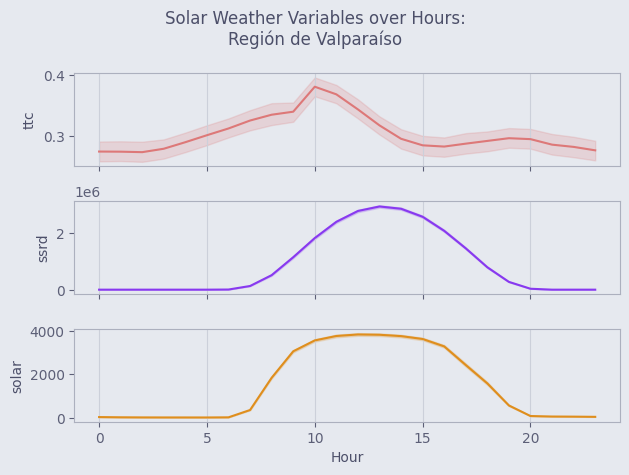

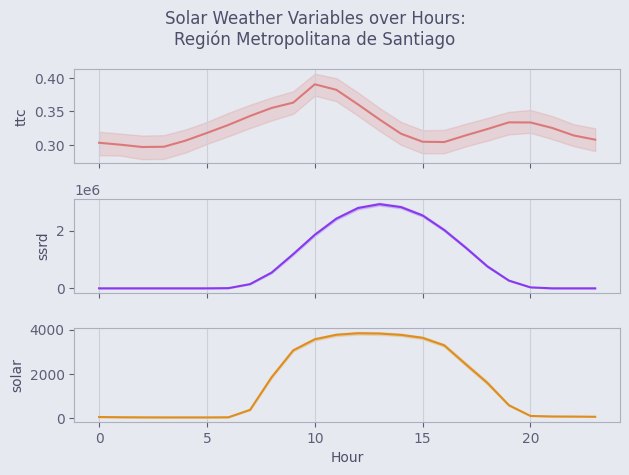

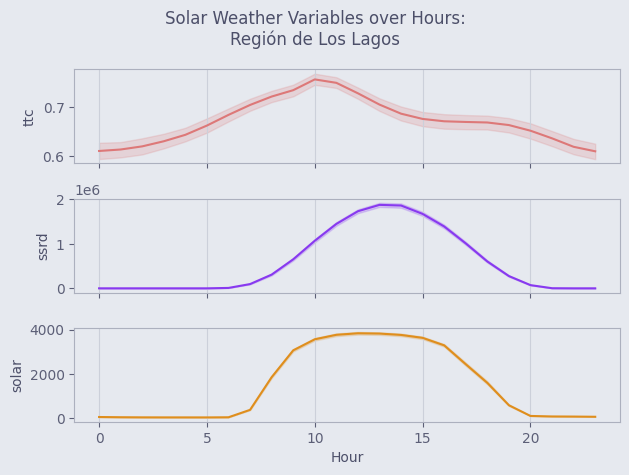

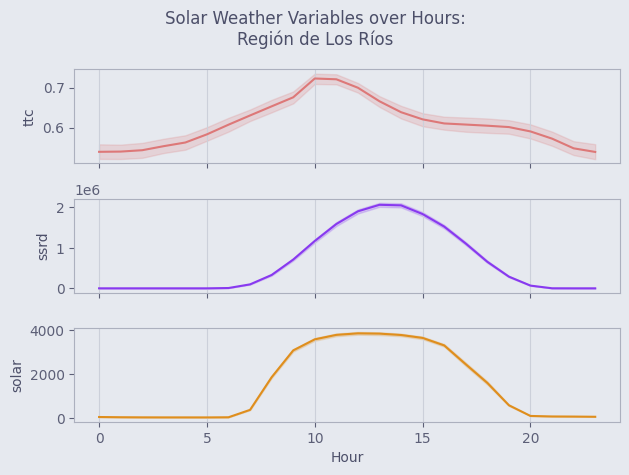

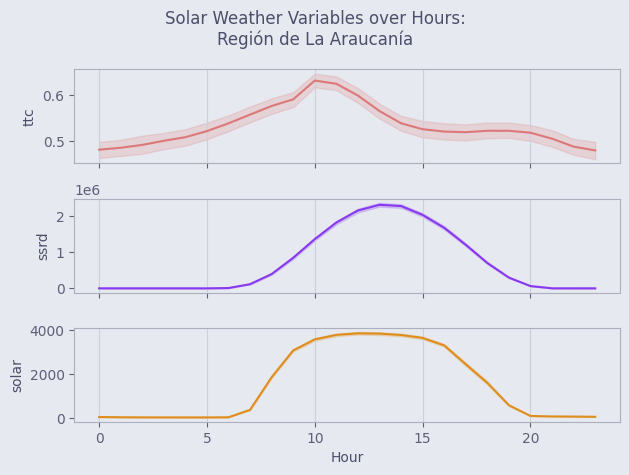

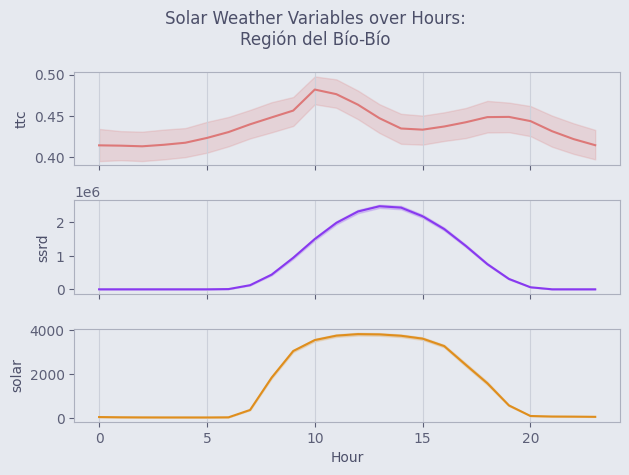

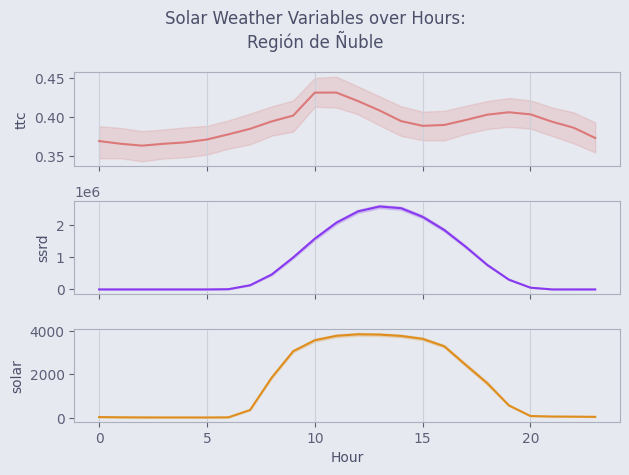

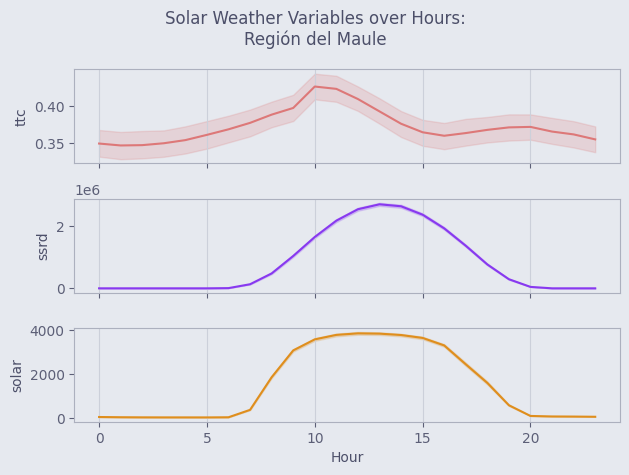

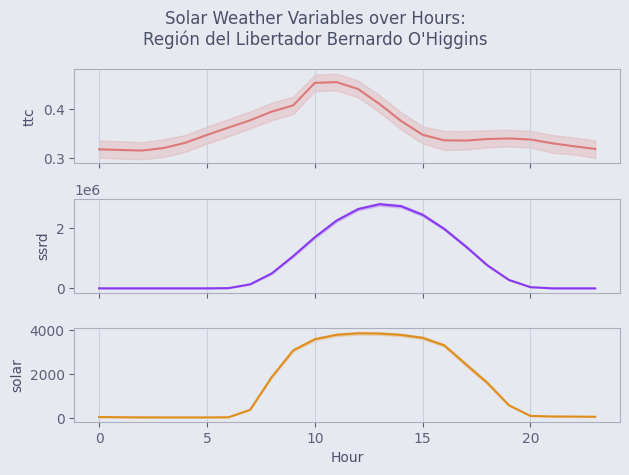

In [ ]:
start_date = "2020-01-01"
end_date = "2024-05-30"

ssrd_plot = ssrd.shift(-4)

ttc_plot = filter_by_date_range(ttc, start_date, end_date)
ssrd_plot = filter_by_date_range(ssrd_plot, start_date, end_date)
gen_plot = filter_by_date_range(generation_tipo, start_date, end_date)

for region in range(ssrd_plot.shape[1] - 1):
    column: int = region
    fig_name: str = f"Solar Weather Variables over Months:\n{ttc.iloc[:, column].name}"

    fig, ax = plt.subplots(3, 1, sharex=True)
    sns.lineplot(
        y=ttc_plot.reset_index().iloc[:, column + 1],
        x=ttc_plot.reset_index()["datetime"].dt.month,
        ax=ax[0],
        color=colors["flamingo"],
        estimator="mean",
    )
    sns.lineplot(
        y=ssrd_plot.reset_index().iloc[:, column + 1],
        x=ssrd_plot.reset_index()["datetime"].dt.month,
        ax=ax[1],
        color=colors["mauve"],
        estimator="mean",
    )

    sns.lineplot(
        y=gen_plot.reset_index()["solar"],
        x=gen_plot.reset_index()["datetime"].dt.month,
        ax=ax[2],
        color=colors["yellow"],
        estimator="mean",
    )

    ax[0].grid(axis="x")
    ax[1].grid(axis="x")
    ax[2].grid(axis="x")
    fig.suptitle(fig_name)
    ax[0].set_ylabel("ttc")
    ax[1].set_ylabel("ssrd")
    ax[2].set_xlabel("Month")
    fig.tight_layout()

    fig.savefig(plots_path / f"{fig_name}.png")

In [10]:
# round(ssrd.shift(-3).head(40))
# round(ssrd_plot.tail())

## Decomposition

### MSTL

In [9]:
periods = [24, int(24 * 365.25)]

# Perform MSTL decomposition
# mstl_result = MSTL(generation_tipo['solar'], periods=periods).fit()

In [10]:
# Guardar resultados intermedios
# with open("solar_mstl.pkl", "wb") as file:
#     pickle.dump(mstl_result, file)

# Cargar resultados más tarde
with open("solar_mstl.pkl", "rb") as file:
    mstl_result = pickle.load(file)  # noqa: S301

In [11]:
# Access components
trend = mstl_result.trend
seasonal_daily = mstl_result.seasonal['seasonal_24']
seasonal_annual = mstl_result.seasonal[f"seasonal_{periods[1]}"]
resid = mstl_result.resid

print("MSTL Components:")
print(f"Trend: {trend.head().values}")
print(f"Daily Seasonality: {seasonal_daily.head().values}")
print(f"Annual Seasonality: {seasonal_annual.head().values}")
print(f"Residuals: {resid.head().values}")

MSTL Components:
Trend: [770.40614364 770.43092802 770.45571246 770.48049695 770.50528149]
Daily Seasonality: [ -998.64640081 -1004.97709042 -1020.93410346 -1027.87243208
 -1019.68597887]
Annual Seasonality: [193.9197363  269.45345136 329.220913   337.94268345 302.72151797]
Residuals: [ 34.32052087 -34.90728896 -78.74252199 -80.55074831 -53.54082059]


<Figure size 2000x1000 with 0 Axes>

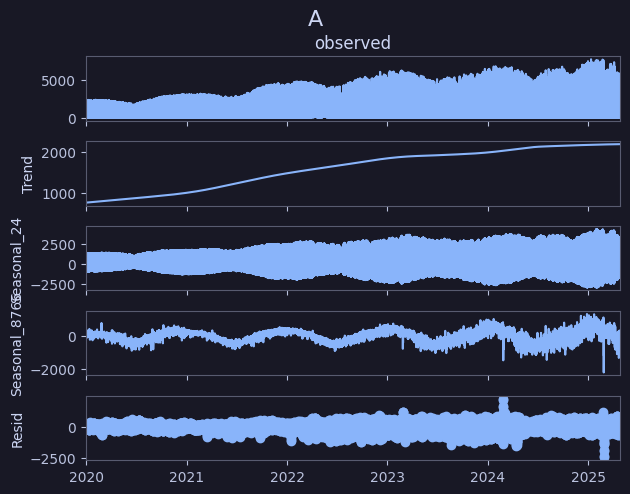

In [24]:
# fig = mstl_result.plot(figsize=(15, 10))
# plt.suptitle('MSTL Decomposition of Solar Production', y=1.02)
# plt.tight_layout()
# plt.show()
plt.figure(figsize=(20, 10))
fig = mstl_result.plot()
plt.suptitle("A", fontsize=16, y=1.02)
# plt.tight_layout()
plt.show()


In [23]:
px.line(seasonal_annual)

In [21]:
trend.reset_index()

,datetime,trend
0,2020-01-01 00:00:00,770.406144
1,2020-01-01 01:00:00,770.430928
2,2020-01-01 02:00:00,770.455712
3,2020-01-01 03:00:00,770.480497
4,2020-01-01 04:00:00,770.505281
...,...,...
46596,2025-04-25 16:00:00,2190.248218
46597,2025-04-25 17:00:00,2190.252560
46598,2025-04-25 18:00:00,2190.256900
46599,2025-04-25 19:00:00,2190.261239


### Ensamble Model